Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

loading dataset

In [31]:
dataset = pd.read_csv('Breast_Cancer.csv')

In [32]:
dataset.shape

(699, 11)

In [33]:
dataset.head()

,Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Margil Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [34]:
dataset.tail()

,Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Margil Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4
698,897471,4,8,8,5,4,5.0,10,4,1,4


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code Number                  699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Margil Adhesion              699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [36]:
dataset.describe(include='all')

,Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Margil Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Check to see if there is any missing values

In [37]:
dataset.isnull().sum()

Code Number                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Margil Adhesion                 0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [39]:
numImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numImputer = numImputer.fit(dataset[['Bare Nuclei']])
dataset[['Bare Nuclei']] = numImputer.transform(dataset[['Bare Nuclei']])
dataset.isnull().sum()

Code Number                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Margil Adhesion                0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

C:\Users\GODFREY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

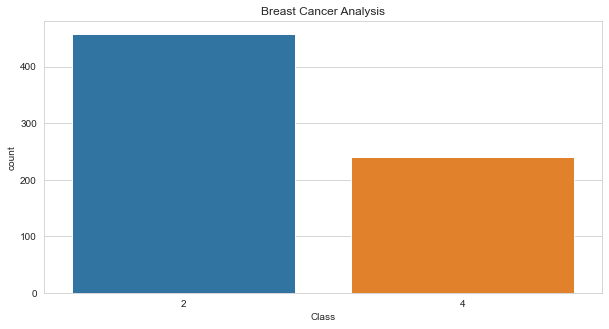

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(dataset.Class)
plt.title('Breast Cancer Analysis')
plt.show

C:\Users\GODFREY\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


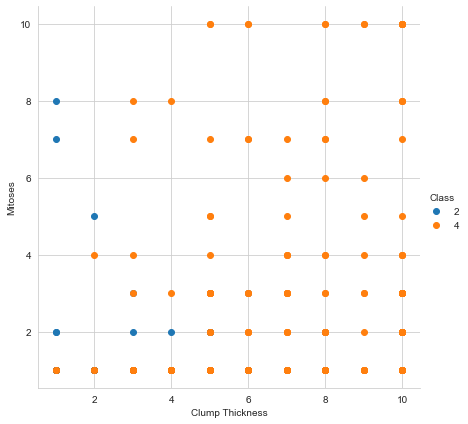

In [45]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'Class', size = 6).map(plt.scatter, 'Clump Thickness', 'Mitoses').add_legend()

Determining the input feature and the class feature in the dataset

In [46]:
X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9]].values
y = dataset.iloc[:, 10].values

Splitting the dataset into test and training dataset

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Scaling the dataset

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

Training the model:
Fitting the K-NN to the training set
N.B: p in the code below is the power parameter for the Minkowski metric. When p=2, this is equivalent to euclidean_distance

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

Evaluating the model:
Predicting the Test set results

In [50]:
y_pred=classifier.predict(X_test_s)
print(y_pred)

[2 2 4 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 2 2 2 4 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2]


In [51]:
print(y_test)

[2 2 2 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2]


In [52]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('------------------------------------------------------')
result=metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.97


Confusion Matrix:
[[82  3]
 [ 1 54]] 


------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           2       0.99      0.96      0.98        85
           4       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



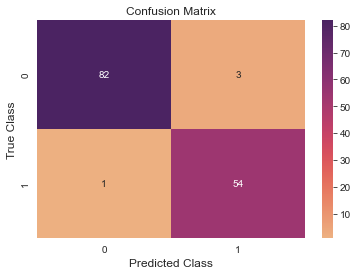

In [53]:
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize = 12)

plt.show()